In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Read the data
data = pd.read_csv('/content/bird.csv')

# Drop the 'id' and 'type' columns
data = data.drop(columns=['id', 'type'])

# Check for missing values
print("Missing values before imputation:\n", data.isnull().sum())

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for missing values after imputation
print("\nMissing values after imputation:\n", data_imputed.isnull().sum())


Missing values before imputation:
 huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
dtype: int64

Missing values after imputation:
 huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


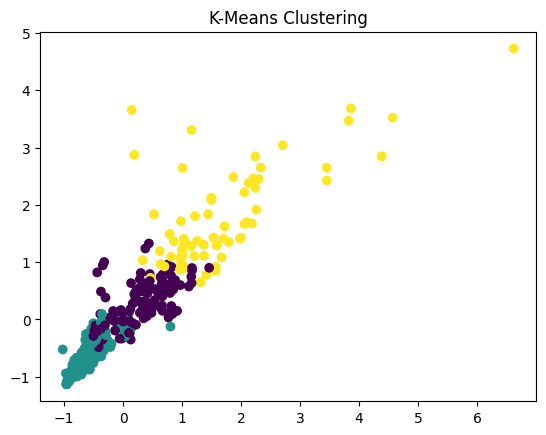

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Plot K-Means Clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


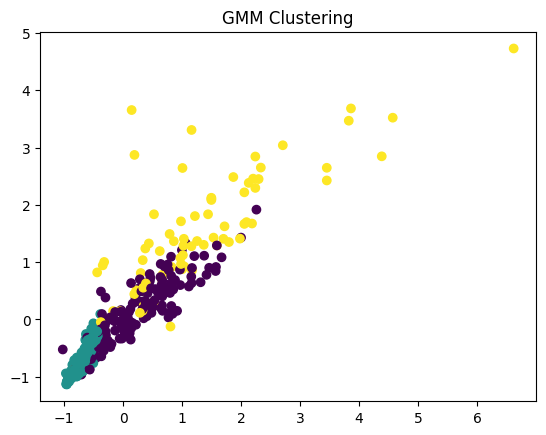

In [12]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

# Plot GMM Clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()


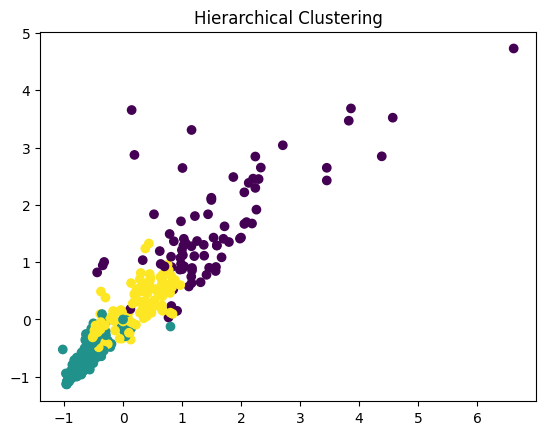

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Plot Hierarchical Clustering
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()


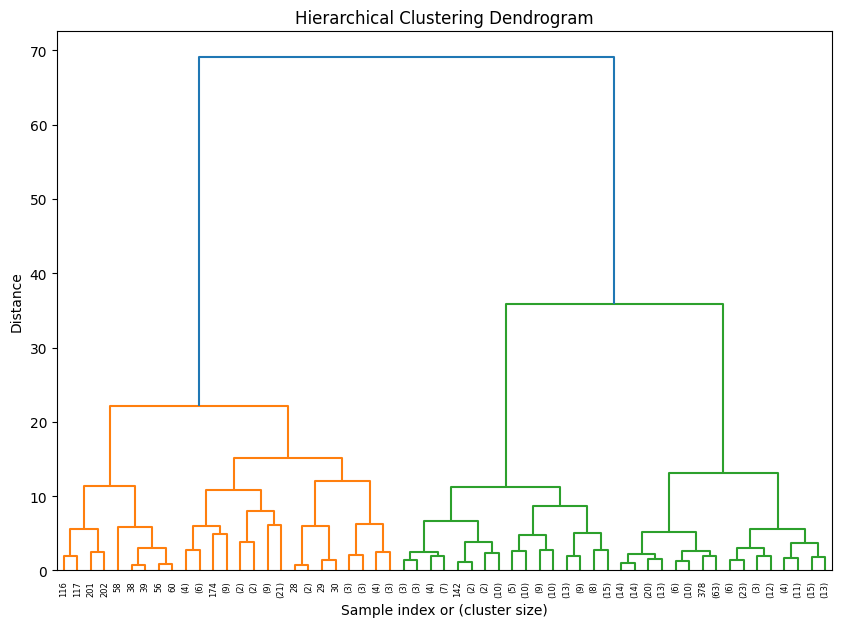

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram for Hierarchical Clustering
linked = linkage(data_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


In [15]:
from sklearn.cluster import AgglomerativeClustering

# Perform final hierarchical clustering with determined number of clusters
n_clusters = 3
hierarchical_final = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_final_labels = hierarchical_final.fit_predict(data_scaled)


In [16]:
# Add cluster labels to the DataFrame
data_imputed['KMeans_Labels'] = kmeans_labels
data_imputed['GMM_Labels'] = gmm_labels
data_imputed['Hierarchical_Labels'] = hierarchical_final_labels

# Display the first few rows of the DataFrame
print(data_imputed.head())


    huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   

   KMeans_Labels  GMM_Labels  Hierarchical_Labels  
0              0           2                    2  
1              0           0                    2  
2              0           0                    2  
3              0           0                    2  
4              0           0                    2  


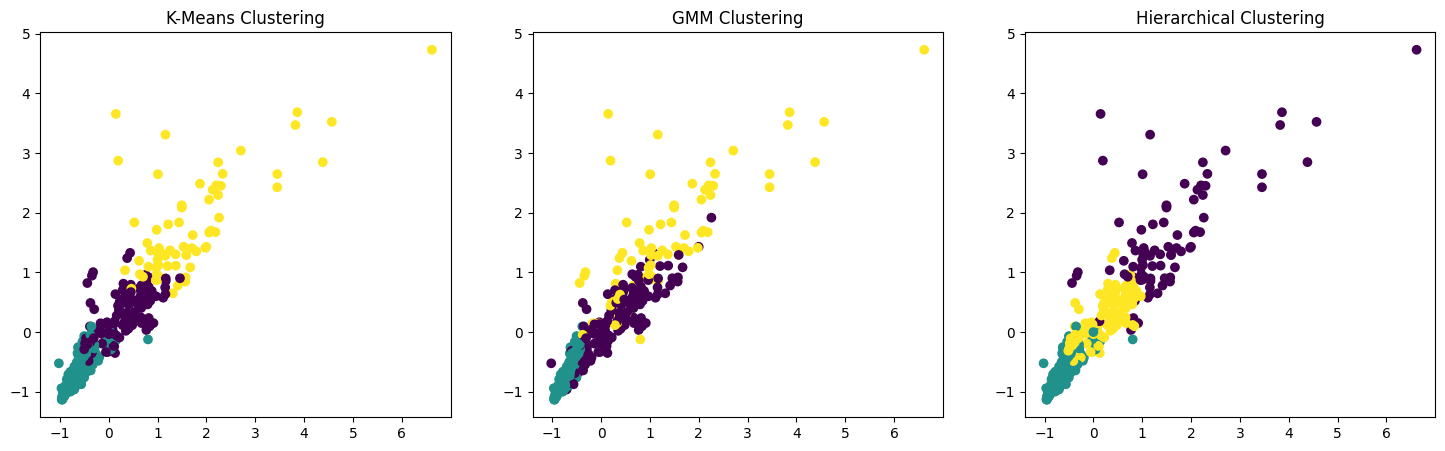

In [17]:
import matplotlib.pyplot as plt

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
axs[0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('K-Means Clustering')

# GMM
axs[1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis')
axs[1].set_title('GMM Clustering')

# Hierarchical
axs[2].scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_final_labels, cmap='viridis')
axs[2].set_title('Hierarchical Clustering')

plt.show()


In [18]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(data_scaled, gmm_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_final_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'GMM Silhouette Score: {gmm_silhouette}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')


K-Means Silhouette Score: 0.49223529964663854
GMM Silhouette Score: 0.28362235084729437
Hierarchical Silhouette Score: 0.46895970271458065


TUNING

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_scaled' is your standardized data

# Step 1: Choose a method (e.g., silhouette score) for optimal clustering evaluation
def evaluate_clusters(data, method, cluster_range):
    scores = []
    for k in cluster_range:
        if method == 'silhouette':
            # Example: Silhouette Score for K-Means
            model = KMeans(n_clusters=k, random_state=42)
            labels = model.fit_predict(data)
            score = silhouette_score(data, labels)
        elif method == 'bic':
            # Example: BIC for GMM
            model = GaussianMixture(n_components=k, random_state=42)
            model.fit(data)
            score = model.bic(data)
        # Add other methods as needed

        scores.append(score)
    return scores

In [20]:
# Step 2: Evaluate optimal number of clusters for each algorithm
cluster_range = range(2, 11)  # Example range of clusters to evaluate
kmeans_scores = evaluate_clusters(data_scaled, 'silhouette', cluster_range)
gmm_scores = evaluate_clusters(data_scaled, 'bic', cluster_range)
hierarchical_scores = evaluate_clusters(data_scaled, 'silhouette', cluster_range)  # Example, adjust as needed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [21]:
# Step 3: Determine the optimal number of clusters for each algorithm
optimal_kmeans_k = cluster_range[np.argmax(kmeans_scores)]
optimal_gmm_k = cluster_range[np.argmin(gmm_scores)]
optimal_hierarchical_k = cluster_range[np.argmax(hierarchical_scores)]


In [22]:
# Step 4: Perform clustering with optimal number of clusters for each algorithm
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Standardize the data if not already done


In [23]:
# Replace NaN values with mean or median (example using mean)
data_imputed = data.fillna(data.mean())

# Drop non-numeric columns if necessary
data_numeric = data_imputed.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_kmeans_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=optimal_gmm_k, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)


In [26]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_hierarchical_k)
hierarchical_labels = hierarchical.fit_predict(data_scaled)


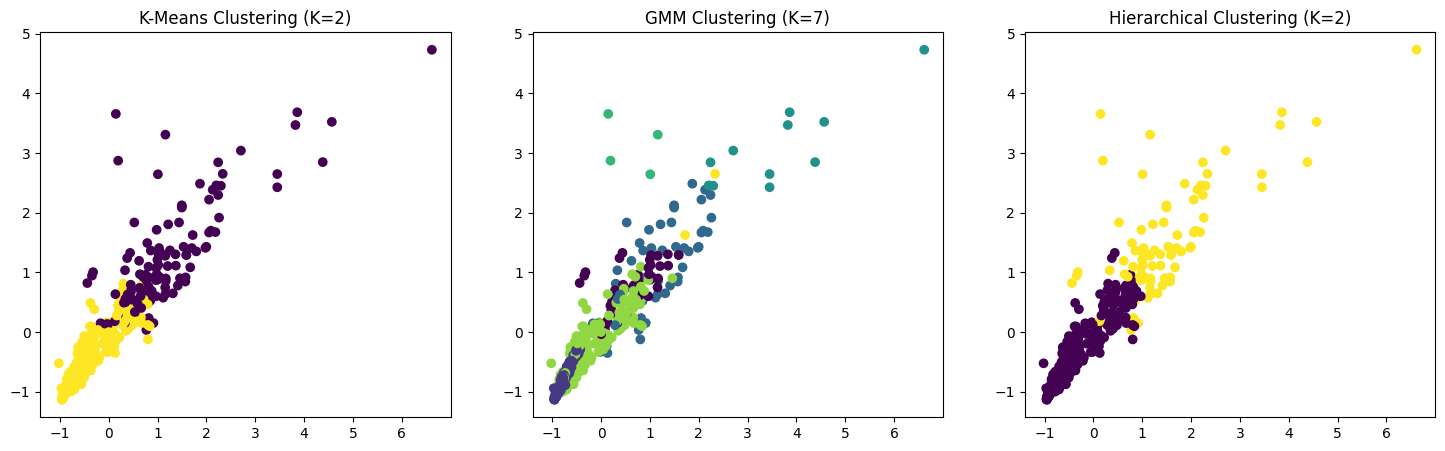

In [27]:
# Step 5: Visualize the clustering results
# Example: Plotting results for K-Means, GMM, and Hierarchical Clustering
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
axs[0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means Clustering (K={optimal_kmeans_k})')

# GMM
axs[1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis')
axs[1].set_title(f'GMM Clustering (K={optimal_gmm_k})')

# Hierarchical
axs[2].scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
axs[2].set_title(f'Hierarchical Clustering (K={optimal_hierarchical_k})')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score after tuning: 0.590209019643273
GMM Silhouette Score after tuning: 0.1272991051005338
Hierarchical Silhouette Score after tuning: 0.5956621910364495


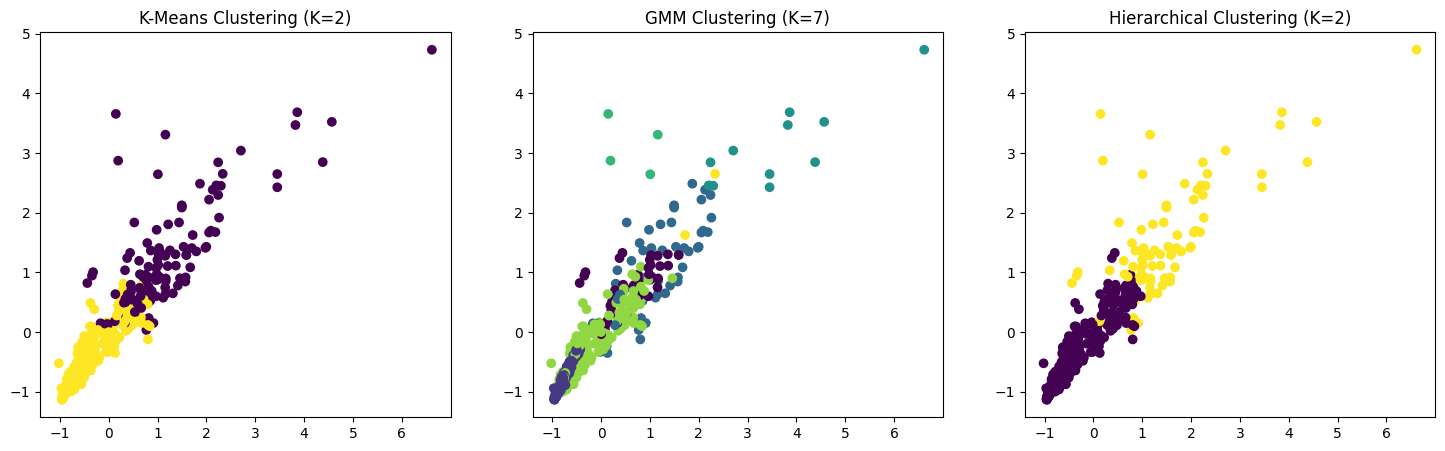

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Replace NaN values with mean or median (example using mean)
data_imputed = data.fillna(data.mean())

# Drop non-numeric columns if necessary
data_numeric = data_imputed.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 2: Perform clustering with optimal number of clusters for each algorithm
# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_kmeans_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=optimal_gmm_k, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_hierarchical_k)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Step 3: Calculate the silhouette scores for each clustering algorithm
kmeans_silhouette_score = silhouette_score(data_scaled, kmeans_labels)
gmm_silhouette_score = silhouette_score(data_scaled, gmm_labels)
hierarchical_silhouette_score = silhouette_score(data_scaled, hierarchical_labels)

# Print the silhouette scores after tuning
print(f"K-Means Silhouette Score after tuning: {kmeans_silhouette_score}")
print(f"GMM Silhouette Score after tuning: {gmm_silhouette_score}")
print(f"Hierarchical Silhouette Score after tuning: {hierarchical_silhouette_score}")

# Step 4: Visualize the clustering results
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
axs[0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means Clustering (K={optimal_kmeans_k})')

# GMM
axs[1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels, cmap='viridis')
axs[1].set_title(f'GMM Clustering (K={optimal_gmm_k})')

# Hierarchical
axs[2].scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
axs[2].set_title(f'Hierarchical Clustering (K={optimal_hierarchical_k})')

plt.show()


BEFORE TUNING

In [28]:
# Example code before tuning
# Assuming default values for number of clusters/components

# K-Means Clustering (default)
kmeans_default = KMeans(n_clusters=3, random_state=42)
kmeans_labels_default = kmeans_default.fit_predict(data_scaled)

# Gaussian Mixture Model Clustering (default)
gmm_default = GaussianMixture(n_components=3, random_state=42)
gmm_labels_default = gmm_default.fit_predict(data_scaled)

# Hierarchical Clustering (default)
hierarchical_default = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_default = hierarchical_default.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
# Assuming optimal_kmeans_k, optimal_gmm_k, optimal_hierarchical_k are determined from tuning process

# K-Means Clustering (tuned)
kmeans_tuned = KMeans(n_clusters=optimal_kmeans_k, random_state=42)
kmeans_labels_tuned = kmeans_tuned.fit_predict(data_scaled)

# Gaussian Mixture Model Clustering (tuned)
gmm_tuned = GaussianMixture(n_components=optimal_gmm_k, random_state=42)
gmm_labels_tuned = gmm_tuned.fit_predict(data_scaled)

# Hierarchical Clustering (tuned)
hierarchical_tuned = AgglomerativeClustering(n_clusters=optimal_hierarchical_k)
hierarchical_labels_tuned = hierarchical_tuned.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


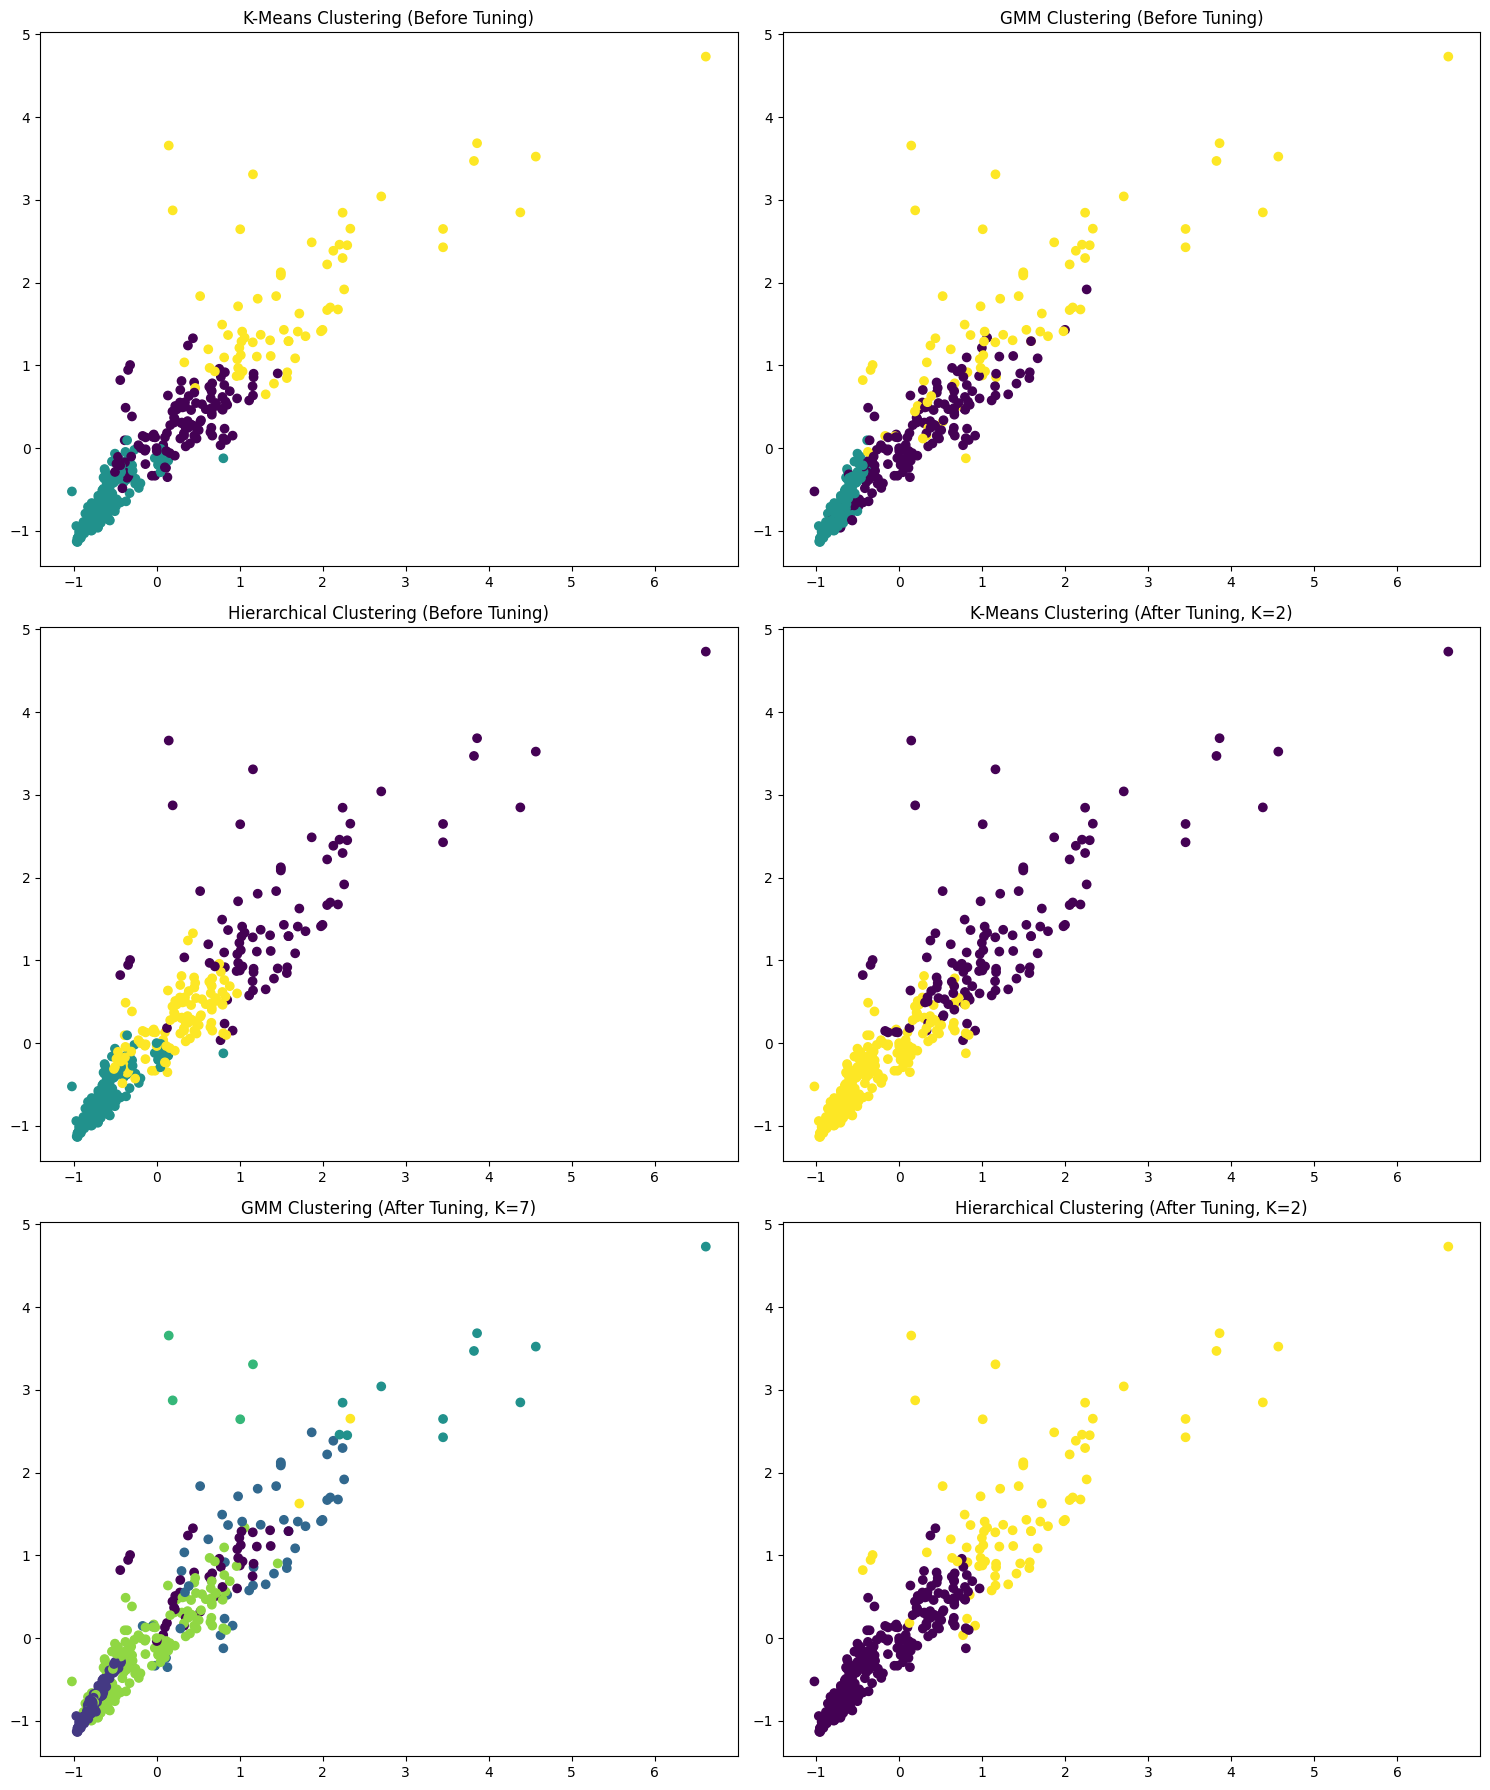

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming you have data_scaled and optimal_kmeans_k, optimal_gmm_k, optimal_hierarchical_k from tuning process

# Read and preprocess your data if not already done
# Example assumes data is already scaled and prepared

# Before Tuning: Using default or arbitrary settings
# ----------------------------------------------

# K-Means Clustering (before tuning)
kmeans_default = KMeans(n_clusters=3, random_state=42)
kmeans_labels_default = kmeans_default.fit_predict(data_scaled)

# Gaussian Mixture Model Clustering (before tuning)
gmm_default = GaussianMixture(n_components=3, random_state=42)
gmm_labels_default = gmm_default.fit_predict(data_scaled)

# Hierarchical Clustering (before tuning)
hierarchical_default = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_default = hierarchical_default.fit_predict(data_scaled)

# After Tuning: Using optimal parameters
# ----------------------------------------------

# K-Means Clustering (after tuning)
kmeans_tuned = KMeans(n_clusters=optimal_kmeans_k, random_state=42)
kmeans_labels_tuned = kmeans_tuned.fit_predict(data_scaled)

# Gaussian Mixture Model Clustering (after tuning)
gmm_tuned = GaussianMixture(n_components=optimal_gmm_k, random_state=42)
gmm_labels_tuned = gmm_tuned.fit_predict(data_scaled)

# Hierarchical Clustering (after tuning)
hierarchical_tuned = AgglomerativeClustering(n_clusters=optimal_hierarchical_k)
hierarchical_labels_tuned = hierarchical_tuned.fit_predict(data_scaled)

# Visualize clustering results
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Before Tuning Plots
axs[0, 0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels_default, cmap='viridis')
axs[0, 0].set_title('K-Means Clustering (Before Tuning)')
axs[0, 1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels_default, cmap='viridis')
axs[0, 1].set_title('GMM Clustering (Before Tuning)')
axs[1, 0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels_default, cmap='viridis')
axs[1, 0].set_title('Hierarchical Clustering (Before Tuning)')

# After Tuning Plots
axs[1, 1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels_tuned, cmap='viridis')
axs[1, 1].set_title(f'K-Means Clustering (After Tuning, K={optimal_kmeans_k})')
axs[2, 0].scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_labels_tuned, cmap='viridis')
axs[2, 0].set_title(f'GMM Clustering (After Tuning, K={optimal_gmm_k})')
axs[2, 1].scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels_tuned, cmap='viridis')
axs[2, 1].set_title(f'Hierarchical Clustering (After Tuning, K={optimal_hierarchical_k})')

plt.tight_layout()
plt.show()


HEATMAP

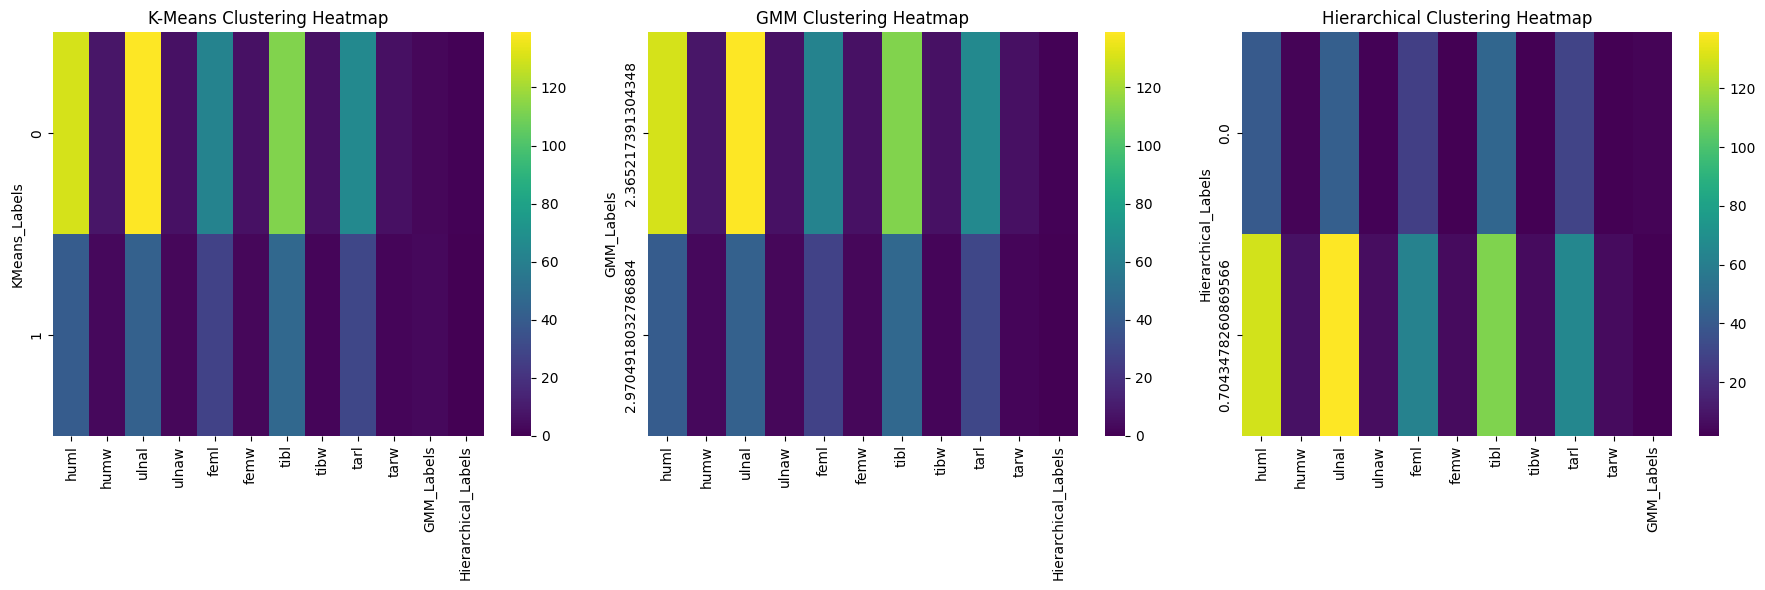

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have data_imputed or data_scaled available after preprocessing

# Add the cluster labels to your dataset
data_with_labels = data_imputed.copy()  # or data_scaled.copy() depending on your pipeline
data_with_labels['KMeans_Labels'] = kmeans_labels_tuned
data_with_labels['GMM_Labels'] = gmm_labels_tuned
data_with_labels['Hierarchical_Labels'] = hierarchical_labels_tuned

# Compute the cluster centers (optional for heatmap)
cluster_centers = data_with_labels.groupby('KMeans_Labels').mean()  # Adjust as needed for other algorithms

# Plotting the heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# K-Means Heatmap
sns.heatmap(cluster_centers.groupby('KMeans_Labels').mean(), cmap='viridis', ax=axs[0])
axs[0].set_title('K-Means Clustering Heatmap')

# GMM Heatmap
sns.heatmap(cluster_centers.groupby('GMM_Labels').mean(), cmap='viridis', ax=axs[1])
axs[1].set_title('GMM Clustering Heatmap')

# Hierarchical Heatmap
sns.heatmap(cluster_centers.groupby('Hierarchical_Labels').mean(), cmap='viridis', ax=axs[2])
axs[2].set_title('Hierarchical Clustering Heatmap')

plt.tight_layout()
plt.show()
